In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [2]:
log_df = pd.read_csv('log_mini.csv')
fea_df = pd.read_csv('tf_mini.csv')

In [3]:
log_df[:50]

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
5,0_00006f66-33e5-4de7-a324-2d18e439fc1e,6,20,t_c815228b-3212-4f9e-9d4f-9cb19b248184,False,False,True,False,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,fwdbtn
6,0_00006f66-33e5-4de7-a324-2d18e439fc1e,7,20,t_e23c19f5-4c32-4557-aa44-81372c2e3705,True,True,True,False,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn
7,0_00006f66-33e5-4de7-a324-2d18e439fc1e,8,20,t_0be6eced-f56f-48bd-8086-f2e0b760fdee,True,True,True,False,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn
8,0_00006f66-33e5-4de7-a324-2d18e439fc1e,9,20,t_f3ecbd3b-9e8e-4557-b8e0-39cfcd7e65dd,False,True,True,False,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn
9,0_00006f66-33e5-4de7-a324-2d18e439fc1e,10,20,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,True,True,True,False,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn


In [4]:
fea_df.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [5]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   skip_1                           167880 non-null  bool  
 5   skip_2                           167880 non-null  bool  
 6   skip_3                           167880 non-null  bool  
 7   not_skipped                      167880 non-null  bool  
 8   context_switch                   167880 non-null  int64 
 9   no_pause_before_play             167880 non-null  int64 
 10  short_pause_before_play          167880 non-null  int64 
 11  long_pause_before_play           167880 non-null  int64 
 12  hist_user_behavi

In [6]:
fea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [7]:
print(log_df.shape)
print(fea_df.shape)

(167880, 21)
(50704, 30)


In [4]:
df_joined = log_df.merge(fea_df, how='left', left_on='track_id_clean', right_on='track_id')

In [5]:
df_joined.shape

(167880, 51)

In [6]:
df_joined.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day,duration,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,...,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084,215.893484,...,3.948916,0.459283,-0.516251,0.268847,0.206278,-0.016393,-0.139975,0.047940,-0.283057,0.059859
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243,60.223626,...,0.336965,0.229190,0.385527,0.193834,0.165442,0.266361,0.313722,0.116279,0.301132,0.261958
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.013330,...,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000,183.503403,...,4.000000,0.280089,-0.841586,0.225853,0.174902,-0.170540,-0.330586,-0.030063,-0.489797,-0.020752
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,212.027023,...,4.000000,0.442400,-0.658701,0.311700,0.235429,0.044054,-0.273355,0.037739,-0.376095,0.143839
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,240.800003,...,4.000000,0.626337,-0.203098,0.374788,0.298177,0.134389,-0.019001,0.139464,-0.180665,0.194377
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000,1787.760986,...,5.000000,0.999990,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213


In [10]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 51 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       167880 non-null  object 
 1   session_position                 167880 non-null  int64  
 2   session_length                   167880 non-null  int64  
 3   track_id_clean                   167880 non-null  object 
 4   skip_1                           167880 non-null  bool   
 5   skip_2                           167880 non-null  bool   
 6   skip_3                           167880 non-null  bool   
 7   not_skipped                      167880 non-null  bool   
 8   context_switch                   167880 non-null  int64  
 9   no_pause_before_play             167880 non-null  int64  
 10  short_pause_before_play          167880 non-null  int64  
 11  long_pause_before_play           167880 non-null  int64  
 12  hi

In [6]:
df_joined.drop(columns='track_id_clean', axis=1, inplace=True)

In [12]:
df_joined.to_csv('joined_spotify.csv')

<AxesSubplot:xlabel='skip_1', ylabel='count'>

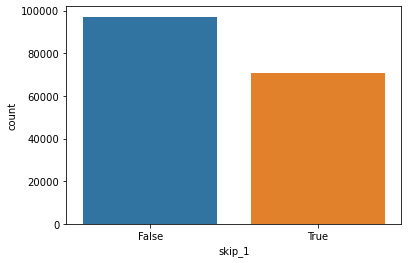

In [13]:
sns.countplot(x = 'skip_1', data = df_joined)

<AxesSubplot:xlabel='skip_2', ylabel='count'>

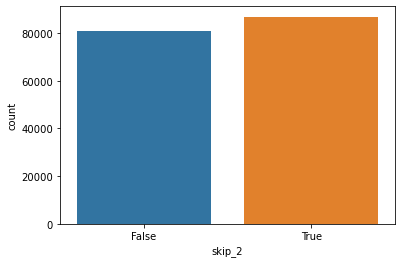

In [14]:
sns.countplot(x = 'skip_2', data = df_joined)

<AxesSubplot:xlabel='skip_3', ylabel='count'>

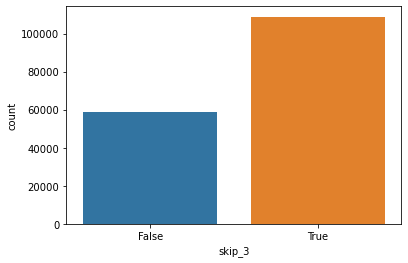

In [15]:
sns.countplot(x = 'skip_3',data = df_joined)

It can be infered that most of the people skip the song at in the 3rd phase.And least amount of people skip the song in the 1st phase.

<AxesSubplot:xlabel='not_skipped', ylabel='count'>

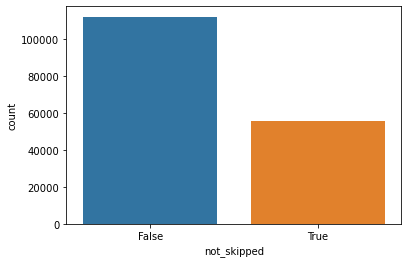

In [16]:
sns.countplot(x = 'not_skipped',data = df_joined)

around 1/3 of people dont skip the song at all

<AxesSubplot:xlabel='context_switch', ylabel='count'>

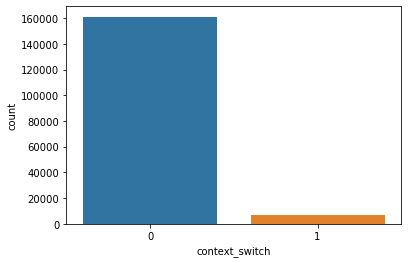

In [17]:
sns.countplot(x = 'context_switch',data = df_joined)

Most of the people dont change the context or they just keep listening to the songs in the playlist

In [18]:
df_joined.skew()

session_position                   0.250537
session_length                    -1.093022
skip_1                             0.317931
skip_2                            -0.068757
skip_3                            -0.621523
not_skipped                        0.709275
context_switch                     4.635773
no_pause_before_play              -1.267181
short_pause_before_play            1.997894
long_pause_before_play             1.730598
hist_user_behavior_n_seekfwd      53.436156
hist_user_behavior_n_seekback    122.850478
hist_user_behavior_is_shuffle      0.828058
hour_of_day                       -0.699712
premium                           -1.583901
duration                           2.220571
release_year                      -3.242944
us_popularity_estimate            -6.242498
acousticness                       1.316370
beat_strength                     -0.120968
bounciness                        -0.325705
danceability                      -0.544787
dyn_range_mean                  

In [19]:
df_joined.var()

session_position                   29.785811
session_length                     11.710258
skip_1                              0.243840
skip_2                              0.249706
skip_3                              0.227985
not_skipped                         0.222072
context_switch                      0.039231
no_pause_before_play                0.178390
short_pause_before_play             0.125134
long_pause_before_play              0.142962
hist_user_behavior_n_seekfwd        0.134906
hist_user_behavior_n_seekback       0.367912
hist_user_behavior_is_shuffle       0.213418
hour_of_day                        35.954933
premium                             0.153641
duration                         3626.885161
release_year                       94.868435
us_popularity_estimate              0.797054
acousticness                        0.060564
beat_strength                       0.025140
bounciness                          0.032042
danceability                        0.025436
dyn_range_

<AxesSubplot:xlabel='loudness', ylabel='Count'>

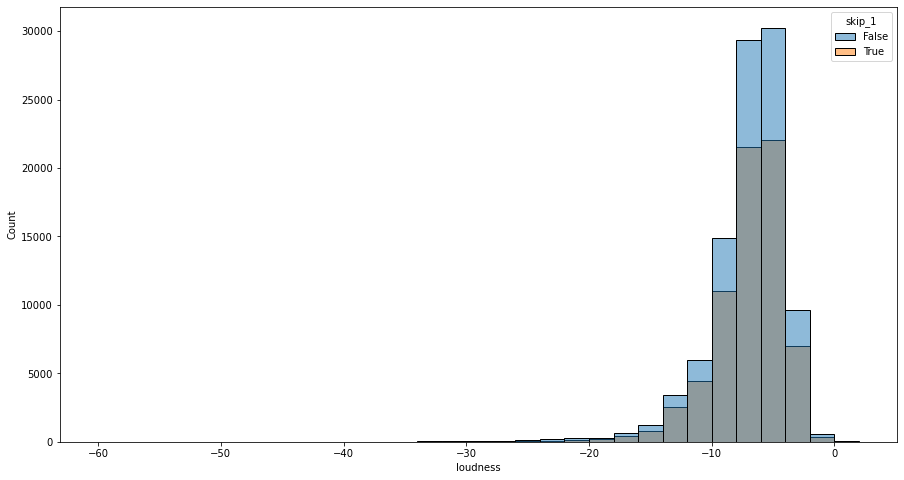

In [20]:
ax = plt.subplots(figsize=(15, 8))
sns.histplot(x='loudness',hue='skip_1', data=df_joined, binwidth=2)

if loudness is in range of -4 to -8, most of the people dont skip the song in 1st phase.

<AxesSubplot:xlabel='loudness', ylabel='Count'>

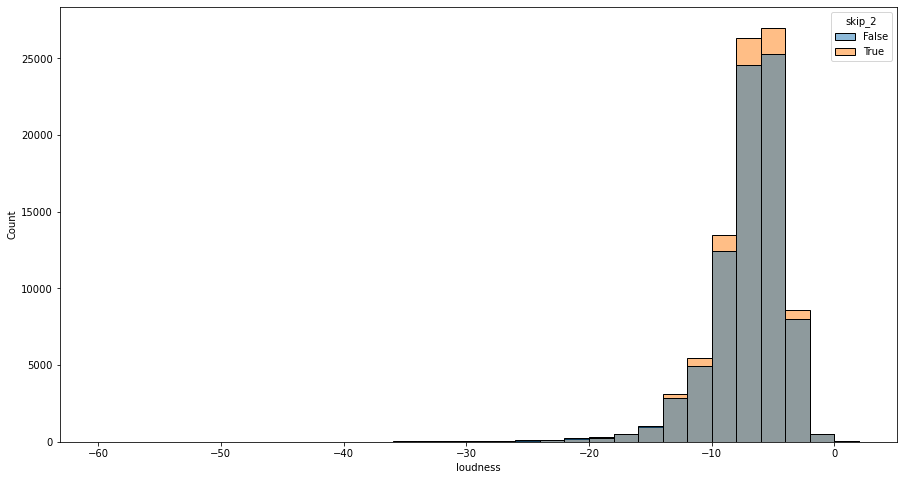

In [21]:
ax = plt.subplots(figsize=(15, 8))
sns.histplot(x='loudness',hue='skip_2', data=df_joined, binwidth=2)

<AxesSubplot:xlabel='loudness', ylabel='Count'>

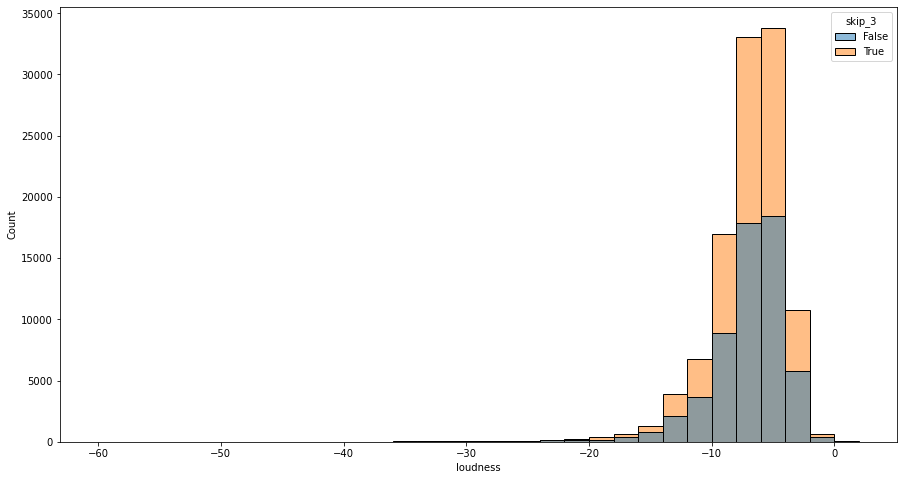

In [22]:
ax = plt.subplots(figsize=(15, 8))
sns.histplot(x='loudness',hue='skip_3', data=df_joined, binwidth=2)

for any loadness value song is getting skipped in 2nd or 3rd phase

<AxesSubplot:xlabel='loudness', ylabel='Count'>

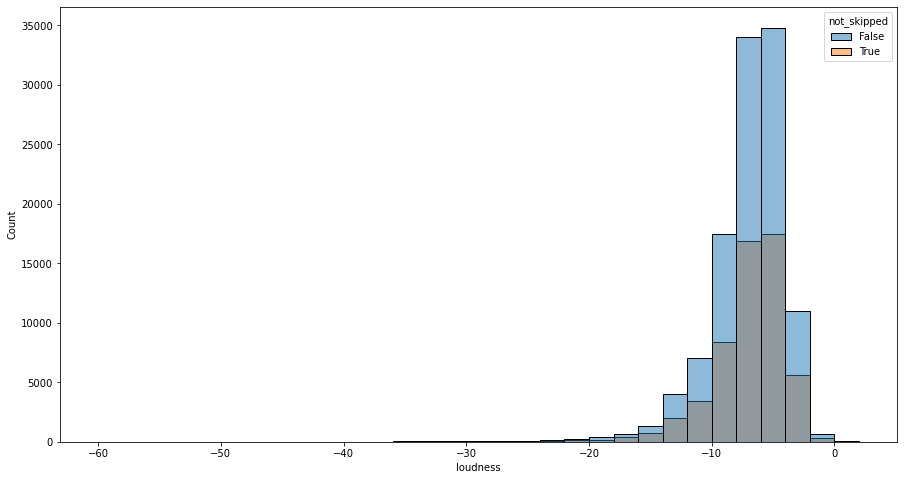

In [23]:
ax = plt.subplots(figsize=(15, 8))
sns.histplot(x='loudness',hue='not_skipped', data=df_joined, binwidth=2)

this proves that if value of loudness is less than zero, most of the songs gets skipped.

<AxesSubplot:xlabel='us_popularity_estimate', ylabel='Count'>

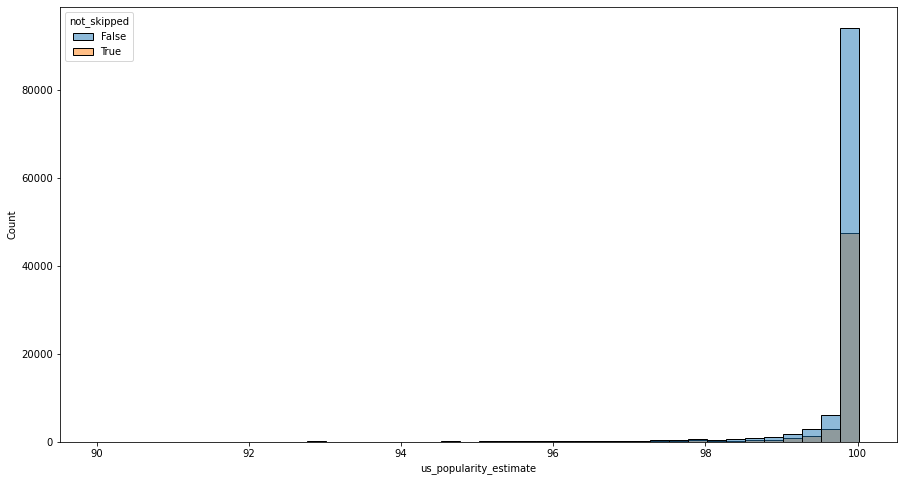

In [24]:
ax = plt.subplots(figsize=(15, 8))
sns.histplot(x='us_popularity_estimate',hue='not_skipped', data=df_joined, binwidth=0.25)

most popular songs are getting skipped more

<AxesSubplot:xlabel='hour_of_day', ylabel='Count'>

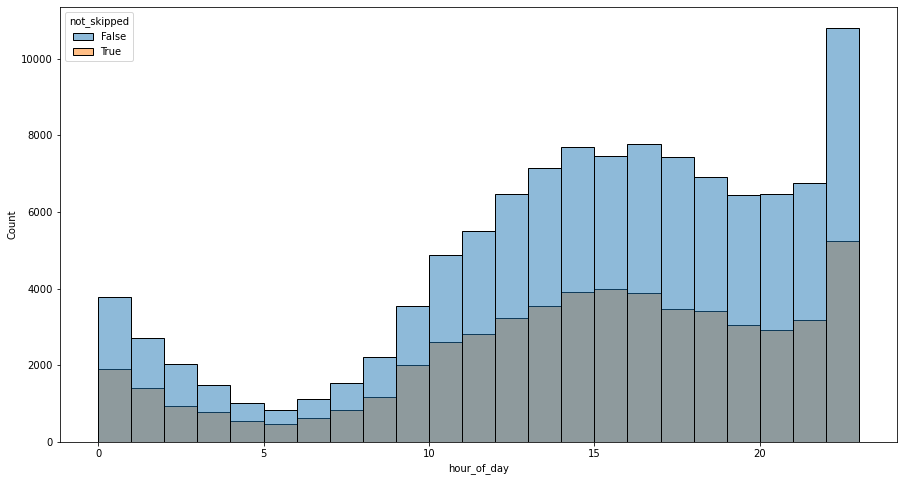

In [25]:
ax = plt.subplots(figsize=(15, 8))
sns.histplot(x='hour_of_day',hue='not_skipped', data=df_joined, binwidth=1)

The ratio of song getting skipped is around 50% for each hour of day. around 12 midnight, people listen the song most.

<AxesSubplot:>

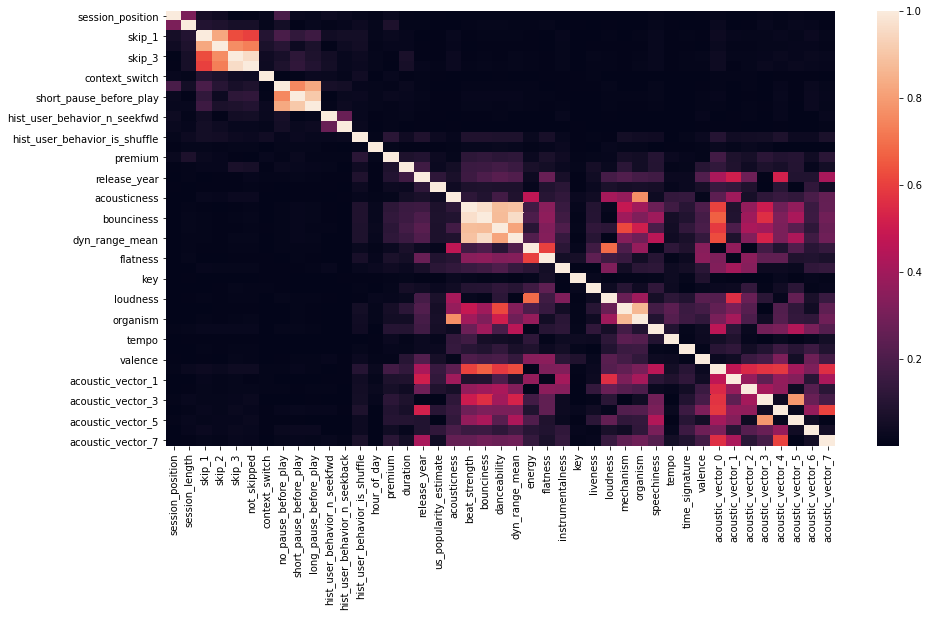

In [26]:
ax = plt.subplots(figsize=(15, 8))
sns.heatmap(data=df_joined.corr().abs())

In [7]:
cont_type = pd.get_dummies(df_joined['context_type'])
cont_type = cont_type.astype('int64')

In [8]:
hist_start = pd.get_dummies(df_joined['hist_user_behavior_reason_start'])
hist_start = hist_start.astype('int64')

In [9]:
hist_end = pd.get_dummies(df_joined['hist_user_behavior_reason_end'])
hist_end = hist_end.astype('int64')

In [10]:
mode = pd.get_dummies(df_joined['mode'])
mode = mode.astype('int64')

In [11]:
df_joined = pd.concat([df_joined, cont_type, hist_start, hist_end, mode], axis=1)
df_joined.shape

(167880, 74)

In [12]:
df_joined.drop(columns=['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end', 'mode'], inplace=True)
df_joined.shape

(167880, 70)

In [13]:
cl = df_joined.columns

In [18]:
for i in range(70):
    print(cl[i], '-->', df_joined.iloc[:,i].unique())

session_id --> ['0_00006f66-33e5-4de7-a324-2d18e439fc1e'
 '0_0000a72b-09ac-412f-b452-9b9e79bded8f'
 '0_00010fc5-b79e-4cdf-bc4c-f140d0f99a3a' ...
 '0_0ead11fc-f32c-4eb4-8fc1-15b51432a404'
 '0_0eae096d-ae4c-4556-8227-0f6294958330'
 '0_0eaeef5d-25e9-4429-bd55-af15d3604c9f']
session_position --> [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
session_length --> [20 11 15 19 10 17 13 12 14 16 18]
skip_1 --> [False  True]
skip_2 --> [False  True]
skip_3 --> [False  True]
not_skipped --> [ True False]
context_switch --> [0 1]
no_pause_before_play --> [0 1]
short_pause_before_play --> [0 1]
long_pause_before_play --> [0 1]
hist_user_behavior_n_seekfwd --> [ 0  1  3  2  5  4  6 23  7 10  9 15  8 16 60 25 20 24 29 38 14 12 11 22
 19]
hist_user_behavior_n_seekback --> [  0   1   2   3  14  13   5   4   6  23   7  53   8  17  12  11  10  20
   9  16  15 151  34  52  73  55  26  21  43  18]
hist_user_behavior_is_shuffle --> [ True False]
hour_of_day --> [16 14 15 19 17 13  8  9 12 23 

In [14]:
df = df_joined.copy()
df.drop(columns=['session_id', 'track_id'], axis=1, inplace=True)

In [15]:
df['date'] = pd.to_datetime(df['date'])

In [16]:
X = df.drop(columns=['skip_1', 'skip_2', 'skip_3', 'not_skipped', 'date'], axis=1)
y = df[['skip_1', 'skip_2', 'skip_3', 'not_skipped']]

In [17]:
# pivoting y

output = []

for i in range(len(y['skip_1'])):
    if y.iloc[i,0] == True:
        output.append(1)                       # 1 --> skip_1 = true
    elif y.iloc[i,1] == True:
        output.append(2)                       # 2 --> skip_2 = true
    elif y.iloc[i,2] == True:
        output.append(3)                       # 3 --> skip_3 = true
    elif y.iloc[i,3] == True:
        output.append(0)                       # 0 --> not_skiped = true
    else:
        output.append(0)                       # special case, all 3 skips are false and not_skipped is also false.


In [19]:
Y = pd.DataFrame(data = output, columns=['lvl_of_skip'])
Y.head()

,lvl_of_skip
0,0
1,0
2,0
3,0
4,0


In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [41]:
X.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,catalog,charts,editorial_playlist,personalized_playlist,radio,user_collection,appload,backbtn,clickrow,endplay,fwdbtn,playbtn,remote,trackdone,trackerror,backbtn,clickrow,endplay,fwdbtn,logout,remote,trackdone,major,minor
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,1.678800e+05,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084,215.893484,2013.368614,99.744583,0.217969,0.547847,0.580170,0.668978,9.098028,0.626536,1.008124,3.174287e-02,5.202692,0.189810,-7.049820,0.596501,0.348247,0.142189,122.674906,3.948916,0.459283,-0.516251,0.268847,0.206278,-0.016393,-0.139975,0.047940,-0.283057,0.059859,0.227919,0.014540,0.212431,0.017727,0.125727,0.401656,0.011568,0.077639,0.104325,0.000119,0.476007,0.000923,0.000810,0.328062,0.000548,0.078205,0.000048,0.088295,0.484805,0.003354,0.001590,0.343704,0.613909,0.386091
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243,60.223626,9.740043,0.892779,0.246097,0.158555,0.179003,0.159486,2.540397,0.181731,0.038892,1.427120e-01,3.681829,0.150867,3.164024,0.207718,0.188667,0.133225,29.821581,0.336965,0.229190,0.385527,0.193834,0.165442,0.266361,0.313722,0.116279,0.301132,0.261958,0.419491,0.119703,0.409030,0.131958,0.331542,0.490235,0.106930,0.267603,0.305682,0.010914,0.499425,0.030372,0.028451,0.469509,0.023403,0.268494,0.006903,0.283725,0.499771,0.057813,0.039848,0.474945,0.486853,0.486853
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.013330,1950.000000,90.018900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000,183.503403,2015.000000,99.913831,0.030579,0.434064,0.451872,0.562350,7.224558,0.513711,0.989104,3.701751e-09,1.000000,0.099943,-8.232000,0.452991,0.205129,0.044635,97.004997,4.000000,0.280089,-0.841586,0.225853,0.174902,-0.170540,-0.330586,-0.030063,-0.489797,-0.020752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.0000

In [21]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [22]:
np.cumsum(pca.explained_variance_ratio_)

array([0.76835394, 0.95663865, 0.97628108, 0.98389601, 0.99056774,
       0.99343847, 0.99555385, 0.99757501, 0.99888193, 0.99904781,
       0.99917939, 0.99927543, 0.99936668, 0.99944784, 0.99951858,
       0.99957132, 0.99961666, 0.99965589, 0.99969076, 0.99972403,
       0.99975533, 0.999783  , 0.99980811, 0.99983224, 0.99985503,
       0.99987491, 0.99989279, 0.99990992, 0.99992167, 0.99993102,
       0.99994013, 0.99994778, 0.9999554 , 0.99996182, 0.99996737,
       0.99997235, 0.99997683, 0.99998126, 0.99998452, 0.99998713,
       0.99998958, 0.99999166, 0.99999353, 0.99999505, 0.99999614,
       0.99999704, 0.99999781, 0.99999832, 0.99999872, 0.99999904,
       0.9999993 , 0.99999948, 0.99999961, 0.99999971, 0.99999982,
       0.99999991, 0.99999996, 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [44]:
pipe = Pipeline([('scalar', MinMaxScaler()), ('pca', PCA(n_components = 4))])
X_transformed = pipe.fit_transform(X)

In [45]:
x_trans = pd.DataFrame(data=X_transformed, columns=['pc_1', 'pc_2', 'pc_3', 'pc_4'])
x_trans.head(10)

,pc_1,pc_2,pc_3,pc_4
0,1.103427,-0.564980,0.106102,0.011347
1,0.841644,0.919889,-0.396460,-0.089065
2,0.921508,-0.451135,-0.429430,-0.009270
3,0.928626,-0.548147,-0.432088,-0.023350
4,0.905070,-0.448440,-0.432234,-0.018499
5,-0.046544,0.772695,0.248712,-0.183551
6,-0.954521,-0.619079,0.046760,-0.262695
7,-0.965195,-0.670428,0.048839,-0.272748
8,-1.049345,0.786274,0.074048,-0.359910
9,-1.039047,0.761823,0.071510,-0.356322


### Logistic Regression

In [46]:
seed = 7
test_size = 0.1
X_1, X_test, y_1, y_test = train_test_split(X, Y['lvl_of_skip'], test_size=test_size, random_state=seed)

In [47]:
seed = 7
test_size = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_1, y_1, test_size=test_size, random_state=seed)

In [48]:
params = {'multi_class':['ovr'],
          'solver': ['liblinear']
         }

lm = linear_model.LogisticRegression()

lr_model = GridSearchCV(lm, params, cv=3)
lr_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'multi_class': ['ovr'], 'solver': ['liblinear']})

In [49]:
lr_model.score(X_val, y_val)

0.8049571461663192

In [50]:
lr_model.best_params_

{'multi_class': 'ovr', 'solver': 'liblinear'}

LR with x_trans and Y = 0.7186207352989841

LR with X and Y = 0.8049571461663192

### K-NN

In [51]:
seed = 7
test_size = 0.1
X_1, X_test, y_1, y_test = train_test_split(x_trans, Y['lvl_of_skip'], test_size=test_size, random_state=seed)

In [52]:
seed = 7
test_size = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_1, y_1, test_size=test_size, random_state=seed)

In [53]:
params = {'n_neighbors':[37],
          'weights': ['distance'],
          'p':[1],
          'algorithm' : ['kd_tree']
         }

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=3)
model.fit(X_train, y_train)
knn_model = model.best_estimator_
y_val_pre = knn_model.predict(X_val)

In [54]:
np.mean(y_val_pre == y_val)

0.8055527979086006

In [55]:
model.best_score_

0.805878897686001

In [56]:
model.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 37, 'p': 1, 'weights': 'distance'}

KNN with x_trans and Y = 0.8054866143816805

KNN with X and Y = 0.6646811608590621

### Random Forest

In [57]:
X_train, y_train = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)

In [58]:
seed = 7
test_size = 0.1
X_1, X_test, y_1, y_test = train_test_split(x_trans, y, test_size=test_size, random_state=seed)

In [59]:
seed = 7
test_size = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_1, y_1, test_size=test_size, random_state=seed)

In [60]:
params = {'max_depth':[1,2,3,4, 8,10,12],
         'n_estimators': [200,1000],
         'criterion': ['entropy'],
         'oob_score':[True],
         'n_jobs':[-1]}

clf1 = RandomForestClassifier()

In [61]:
model = GridSearchCV(clf1, params, cv=3)
model.fit(x_trans, y)
clf_model = model.best_estimator_
print(clf_model.oob_score_)

0.9274258398856325


In [62]:
print(clf_model)

RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=1000,
                       n_jobs=-1, oob_score=True)


In [63]:
model_pipeline = Pipeline(steps=[('rf_c',RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=1000,
                                                                n_jobs=-1, oob_score=True))])
model_pipeline.fit(X_train,y_train)
y_val_pre = model_pipeline.predict(X_val)
np.mean(y_val_pre == y_val)                          # val score

skip_1         0.877362
skip_2         0.872133
skip_3         0.976703
not_skipped    0.982064
dtype: float64

X= original X

x_trans = X with PCA

Y = 1D ouput 

y = 4D output

RF with X and y ----------> 0.9304130926852514

RF with X and Y ----------> 0.8023428968529733

RF with x_trans and Y --> 0.8024752639068136

RF with x_trans and y --> 0.9274258398856325

### SVM

In [64]:
seed = 7
test_size = 0.1
X_1, X_test, y_1, y_test = train_test_split(x_trans, Y.lvl_of_skip, test_size=test_size, random_state=seed)

In [65]:
seed = 7
test_size = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_1, y_1, test_size=test_size, random_state=seed)

In [66]:
svm_model = SVC(kernel='sigmoid', decision_function_shape='ovo')

In [67]:
svm_model.fit(X_train,y_train)

SVC(decision_function_shape='ovo', kernel='sigmoid')

In [68]:
y_pre_svm = svm_model.predict(X_val)

In [69]:
accuracy_score(y_val, y_pre_svm)

0.638075383037162

<b>With PCA with Y</b>

SVC(kernel='sigmoid') =  0.6389688606505841

SVC(kernel='sigmoid', class_weight='balanced', decision_function_shape='ovo', random_state=7) = 0.6236804659320295

SVC(kernel='sigmoid', gamma='auto', class_weight='balanced', decision_function_shape='ovo', random_state=7) = 0.6101128429133988

<b>Original Data with Y</b>

SVC(kernel='sigmoid') = 0.4212912406102121

SVC(kernel='sigmoid',class_weight='balanced', decision_function_shape='ovo', random_state=7) = 0.3332340580429531

SVC(kernel='sigmoid', gamma='auto', class_weight='balanced', decision_function_shape='ovo', random_state=7) = 0.4213574241371323

<b>In case of SVM, when we are having high dimentionality in the data the model is not able to perform well. After applying PCA when we reduced the number of features(PCs) to 4 the model is starting to perform well. But it is still not able to find the pattern in the data that well. The best val score it can give is around 64%</b>